<a href="https://colab.research.google.com/github/IsaacFigNewton/CSC-480/blob/main/CSC480_Assignment3_Rudnick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Config

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Dense,
    Conv2D,
    Dropout,
    MaxPooling2D,
    Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
batch_size = 50

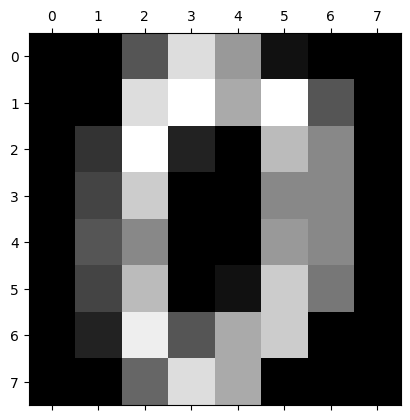

In [3]:
# Load the dataset and display the first image to make sure it loaded correctly
dataset = sklearn.datasets.load_digits()
plt.matshow(dataset.images[0], cmap="gray")
plt.show()

# Preprocessing
- Split the dataset into training, validation, and test sets
- Normalize or scale the input features as needed (e.g., scale pixel values to [0,1]).

In [4]:
# standardize the dataset
dataset.data = dataset.data.astype("float32") / 255.0
# reshape the input sets for 2D image format
dataset.data = dataset.data.reshape(dataset.data.shape[0], 8, 8, 1)
# One-hot encode the labels
dataset.target = to_categorical(dataset.target)
dataset.data.shape

(1797, 8, 8, 1)

In [5]:
# Split dataset into train/validation, test sets (90-10 split)
X, X_test, y, y_test = train_test_split(
    dataset.data,
    dataset.target,
    test_size=0.2,
    random_state=69
)

print("Training and validation combined set:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print()
print("Test set:")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Training and validation combined set:
X shape: (1437, 8, 8, 1)
y shape: (1437, 10)

Test set:
X_test shape: (360, 8, 8, 1)
y_test shape: (360, 10)


# Neural Network Implementation
- Implement a neural network using PyTorch or TensorFlow.
- Include at least one hidden layer.
- Choose appropriate activation functions (e.g., ReLU, sigmoid).
- Use a suitable loss function
- Select an optimizer and tune hyperparameters (e.g., learning rate).

In [44]:
model = tf.keras.models.Sequential([
  Input(shape=(8, 8, 1)),
  Conv2D(
      filters=16,
      kernel_size=(3, 3),
      strides=(1, 1),
      padding="same",
      activation="relu"
  ),
  Conv2D(
      filters=32,
      kernel_size=(2, 2),
      strides=(2, 2),
      padding="same",
      activation="relu"
  ),
  MaxPooling2D(
      pool_size=(2, 2),
      padding="same"
  ),
  Flatten(),
  Dense(
      units=64,
      activation="relu"
  ),
  Dropout(0.5),
  Dense(
      units=32,
      activation="relu"
  ),
  Dropout(0.2),
  Dense(
      units=10,
      activation="softmax"
  )
])

# Training and Validation
- Train the model on the training set for a reasonable number of epochs.
- Monitor performance on the validation set to prevent overfitting (e.g., early stopping or learning rate scheduling).
- Plot training and validation loss/accuracy over epochs.

In [45]:
# test model
model(X[:1]).numpy()

array([[0.0998774 , 0.10011506, 0.10007394, 0.09958521, 0.09973779,
        0.10024498, 0.10002573, 0.10023697, 0.10079314, 0.0993097 ]],
      dtype=float32)

In [46]:
# set model hyperparameters
num_epochs = 100
learning_rate = 0.001
loss_fn = CategoricalCrossentropy()

# add config to model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=loss_fn,
    metrics=["accuracy"]
)

## Train model

In [47]:
training_history = model.fit(
    X,
    y,
    batch_size=batch_size,
    epochs=num_epochs,
    verbose=1,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1067 - loss: 2.3026 - val_accuracy: 0.1319 - val_loss: 2.3003
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1066 - loss: 2.3002 - val_accuracy: 0.1181 - val_loss: 2.2962
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1265 - loss: 2.2945 - val_accuracy: 0.1562 - val_loss: 2.2848
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1949 - loss: 2.2790 - val_accuracy: 0.2257 - val_loss: 2.2402
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1901 - loss: 2.2327 - val_accuracy: 0.3715 - val_loss: 2.1313
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2216 - loss: 2.1447 - val_accuracy: 0.3507 - val_loss: 1.9512
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2899 - loss: 1.9923 - val_accuracy: 0.3681 - val_loss: 1.7700
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3023 - loss: 1.8915 - val_accuracy: 0.5000 - 

## Loss visualizations

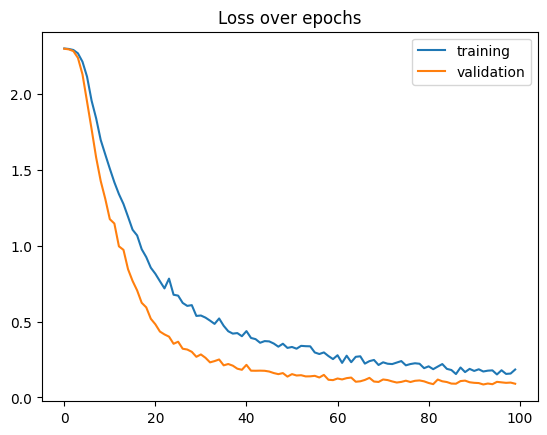

In [48]:
plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])
plt.legend(["training", "validation"])
plt.title("Loss over epochs")
plt.show()

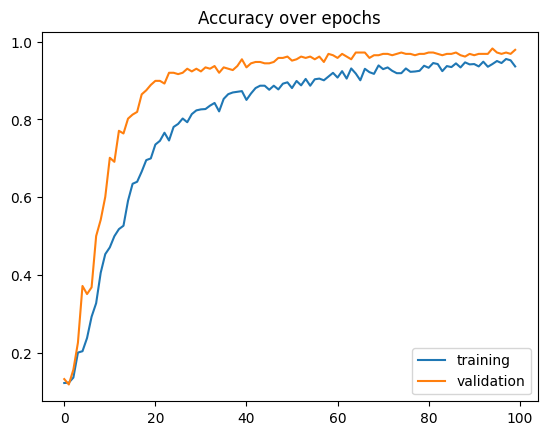

In [49]:
plt.plot(training_history.history["accuracy"])
plt.plot(training_history.history["val_accuracy"])
plt.legend(["training", "validation"])
plt.title("Accuracy over epochs")
plt.show()

# Evaluation
- Report the accuracy on the test set.
- Provide a confusion matrix to analyze model performance across classes.

In [50]:
evaluation_results = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation_results[1]}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9704 - loss: 0.1165 
Test accuracy: 0.9750000238418579


In [51]:
# get the predicted classes by getting the idx of the class with the highest probability
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


## Evaluation visualizations

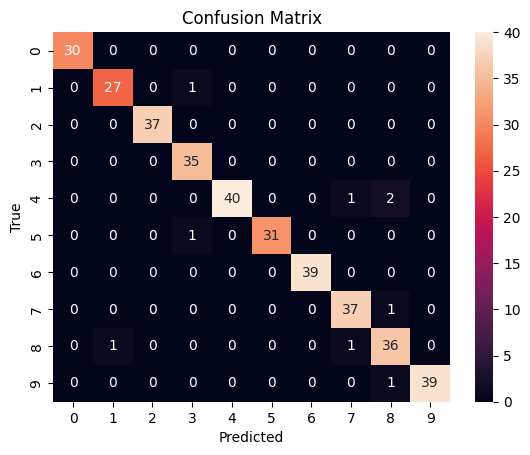

In [52]:
# plot the model's results with a confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Run model on samples from dataset

Model prediction: 0


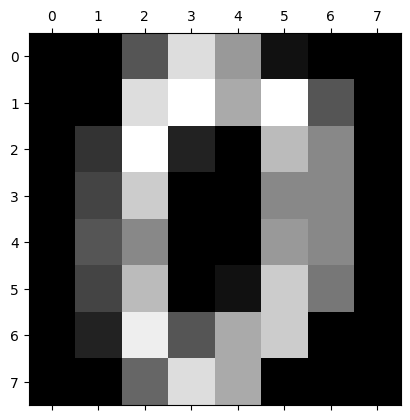

Model prediction: 1


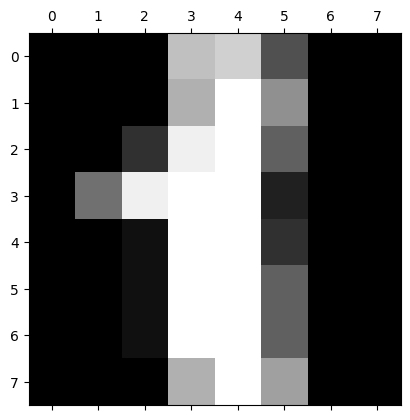

Model prediction: 2


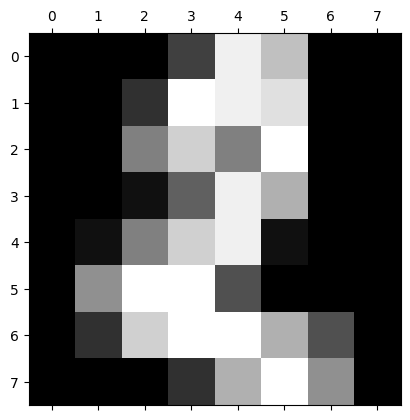

Model prediction: 3


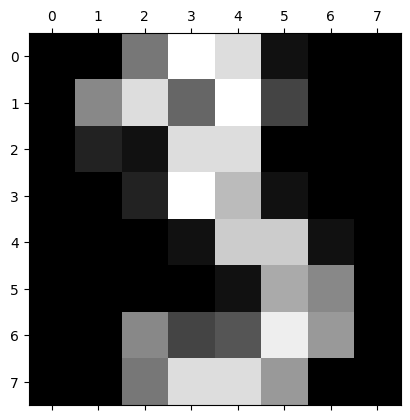

Model prediction: 4


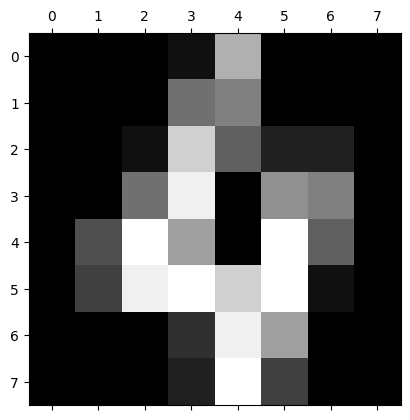

In [55]:
# run model on samples from dataset
for i in range(5):
  plt.matshow(dataset.images[i], cmap="gray")
  prediction = model(dataset.data[i].reshape(1, 8, 8, 1)).numpy()
  print(f"Model prediction: {np.argmax(prediction)}")
  plt.show()

## ChatGPT-generated visuals

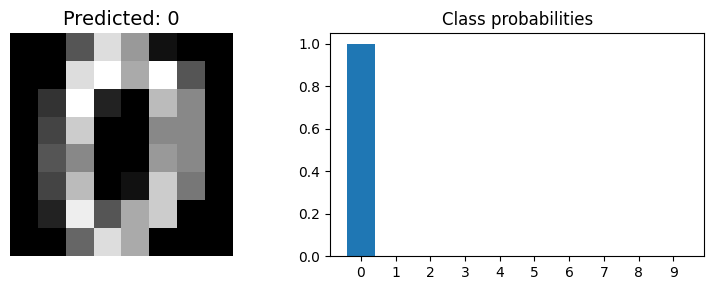

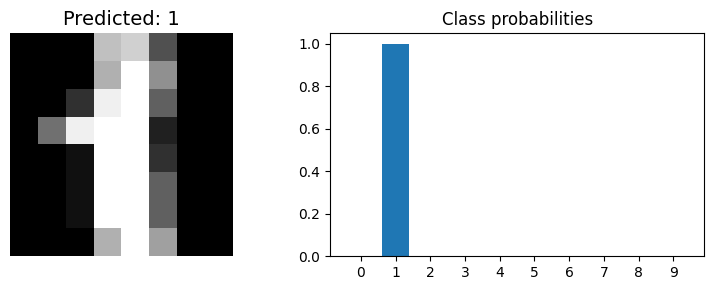

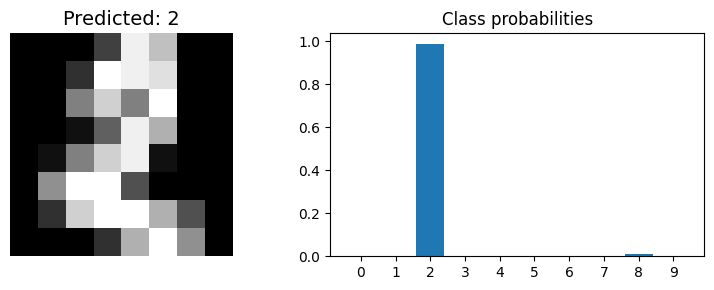

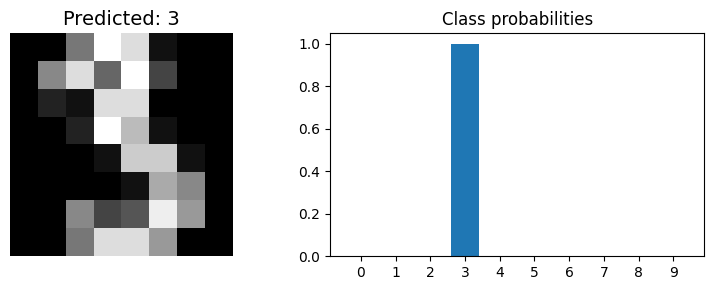

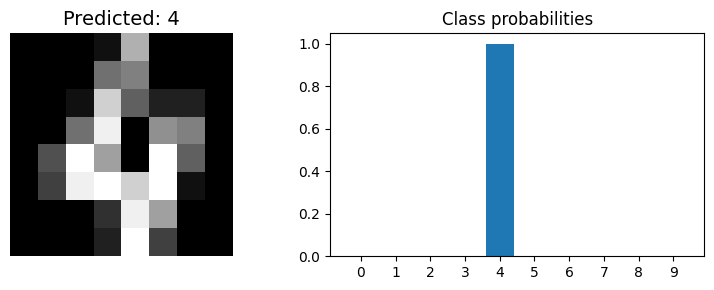

In [56]:
# Run model on samples from dataset
for i in range(5):
    img = dataset.images[i]
    prediction = model(dataset.data[i].reshape(1, 8, 8, 1)).numpy()
    pred_class = np.argmax(prediction)
    probs = prediction[0]

    # Create figure with two subplots: image + bar chart
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))

    # Show the digit
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title(f"Predicted: {pred_class}", fontsize=14)
    ax[0].axis("off")

    # Show probability distribution
    ax[1].bar(range(len(probs)), probs)
    ax[1].set_title("Class probabilities", fontsize=12)
    ax[1].set_xticks(range(len(probs)))

    plt.tight_layout()
    plt.show()